## Introdução

Desde outubro do ano passado, com a liberação do ChatGPT 3.5, as interfaces conversacionais vem se popularizando de maneira muito rápida. É verdade que interfaces conversacionais não são novidade, e chatbots e assistentes virtuais vem dominando tarefas relacionadas a atendimento de clientes, mas desde o advento do ChatGPT, tem-se expandido para outras áreas de atuação.

Utilizamos o ChatGPT para criarmos resumos de textos longos, para consultar algo que ocorreu no passado, explicar conceitos e por aí vai. Já existem cursos que ensinam como utilizar o ChatGPT para criar campanhas de marketing nas redes sociais e outras tantas funções que são basicamente apoiadas em texto.

Dentro da programação, é possível gerar pequenos trechos de código e até páginas HTML e arquivos CSS inteiros.

## E o que isso tem a ver com Ciências de Dados?

Os DataFrames são basicamente textos organizados em tabelas e colunas, que são correlacionados. Portanto, é possível carregar os dados em um modelo LLM (Large Language Model), habilitando a extração da informação destes DataFrames de maneira conversacional, como se estivéssemos dialogando.

## Ok, então o que é o Pandas AI?

![Pandas e Llamas](pandas-llamas.png)

O Pandas AI é o melhor amigo do seu DataFrame! Com esta nova biblioteca, podemos dar aos nossos DataFrames a capacidade de serem consultados de maneira simples e eficiente, utilizando uma interface conversacional.

Então, vamos ver como podemos utilizar Pandas AI?

### Preparando o Ambiente

A primeira coisa é garantir que seu ambiente tenha todas as bibliotecas necessárias instaladas: `Pandas`, `PandasAI`, `OpenAI`.

```bash
$ pip install pandas pandasai openai
```

Então, vamos iniciar o nosso notebook. Temos que fazer o import das bibliotecas que vamos utilizar na nossa demonstração.

In [7]:
import os
import pandas as pd

from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from dotenv import load_dotenv

Observe que carregamos a função `load_dotenv`, pois iremos precisar carregar a chave de acesso para a API da OpenAI. Para fazer isso, podemos simplesmente executar a função.

In [4]:
load_dotenv()

True

O próximo passo é carregar os nossos dados no DataFrame. Como sempre, vamos utilizar o dataset de pokemons.


In [5]:
pokemons = pd.read_csv('pokemons.csv')

Em seguida, vamos inicializar o LLM para que consigamos conversar com o nosso DataFrame.

In [9]:
llm = OpenAI(api_token=os.environ['OPENAI_API_KEY'])
pandas_ai = PandasAI(llm)

Até agora, tudo correu bem! Agora, podemos executar diversas vezes a função `pandas_ai.run`, passando nosso DataFrame e um prompt, e ele nos responderá. Vamos testar?

In [10]:
pandas_ai.run(pokemons, prompt="Quantos pokemons temos no DataFrame?")

'No DataFrame, temos um total de 1032 pokemons.'

Para verificar isso, podemos apenas ver o shape do DataFrame e confirmar:

In [11]:
pokemons.shape

(1032, 44)

De fato, 1032 pokemons. Vamos continuar?

In [12]:
pandas_ai.run(pokemons, prompt="Quantos tipos de pokemons existem?")

'Well, there are actually 18 different types of pokemons out there!'

Vamos conferir?

In [18]:
tipos = pd.concat([pokemons['Type 1'], pokemons['Type 2']]).unique().tolist()


print(len(tipos))
print(tipos)

19
['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying', nan]


Parece que funciona mesmo! Vamos nos aprofundar mais um pouco...

In [19]:
pandas_ai.run(pokemons, prompt='Liste os tipos com as quantidades de pokemons')

'Existem diversos tipos de pokemons e suas quantidades variam. O tipo mais comum é o Water, com 131 pokemons, seguido pelo Normal com 114 e Grass com 91. Já o tipo menos comum é o Flying, com apenas 8 pokemons. No total, existem 18 tipos diferentes de pokemons.'

Ele respondeu, mas não exatamente como queríamos. Vamos tentar melhorar.

In [20]:
pandas_ai.run(pokemons, prompt="Crie uma tabela que tem duas colunas: tipo de pokemon e quantidade. Liste todos os tipos possíveis e suas quantidades.")

'Para responder à pergunta, criei uma tabela com duas colunas: tipo de pokemon e quantidade. Nessa tabela, listei todos os tipos possíveis de pokemon e suas respectivas quantidades. Por exemplo, há 81 pokemons do tipo Bug, 46 do tipo Dark, 42 do tipo Dragon, e assim por diante. No total, foram listados 18 tipos diferentes de pokemon e suas quantidades correspondentes.'

Humm, ainda não consegui listar. Vamos continuar:

In [21]:
pandas_ai.run(pokemons, prompt="Gerar uma listagem completa da quantidade de pokemons por tipo, em formato markdown.")

'Para saber a quantidade de pokemons por tipo, podemos gerar uma listagem completa em formato markdown. Aqui está a tabela com o número de pokemons para cada tipo: \n\n| Type | Count |\n|------|-------|\n| Bug | 81 |\n| Dark | 46 |\n| Dragon | 42 |\n| Electric | 59 |\n| Fairy | 22 |\n| Fighting | 42 |\n| Fire | 64 |\n| Flying | 8 |\n| Ghost | 41 |\n| Grass | 91 |\n| Ground | 41 |\n| Ice | 38 |\n| Normal | 114 |\n| Poison | 40 |\n| Psychic | 77 |\n| Rock | 59 |\n| Steel | 36 |\n| Water | 131 |\n\nAssim, você pode ter uma visão geral da distribuição dos tipos de pokemons na lista.'

Vamos ver o nosso resultado formatado. 

Para saber a quantidade de pokemons por tipo, podemos gerar uma listagem completa em formato markdown. Aqui está a tabela com o número de pokemons para cada tipo: 

| Type | Count |
|------|-------|
| Bug | 81 |
| Dark | 46 |
| Dragon | 42 |
| Electric | 59 |
| Fairy | 22 |
| Fighting | 42 |
| Fire | 64 |
| Flying | 8 |
| Ghost | 41 |
| Grass | 91 |
| Ground | 41 |
| Ice | 38 |
| Normal | 114 |
| Poison | 40 |
| Psychic | 77 |
| Rock | 59 |
| Steel | 36 |
| Water | 131 |

Assim, você pode ter uma visão geral da distribuição dos tipos de pokemons na lista.'

Parece ter funcionado bem. Mas vamos complicar...

In [22]:
pandas_ai.run(pokemons, prompt="Qual o pokemon mais pesado?")

'Bem, o pokemon mais pesado é o Snorlax, ele pode chegar a pesar mais de 460 quilos!'

E vamos conferir: vamos ordenar os pokemons por peso e filtrar aqueles com peso >= 460.

In [26]:
pokemons[["Name","Weight"]].sort_values("Weight").query("Weight > 459")

,Name,Weight
925,Dusk Mane Necrozma,460.0
181,Snorlax,460.0
837,Hoopa Unbound,490.0
826,Avalugg,505.0
1001,Stonjourner,520.0
445,Metagross,550.0
833,Zygarde Complete,610.0
578,Giratina-Origin,650.0
1007,Copperajah,650.0
573,Dialga,683.0


Algo deu errado. Vamos perguntar algo relacionado a um pokemon que parece não ter sido considerado mais pesado, mas é...

In [27]:
pandas_ai.run(pokemons, prompt="O pokemon Dialga é mais ou menos pesado que o Snorlax?")

'Well, it turns out that Snorlax is actually heavier than Dialga.'

Humm, vamos ter que perguntar o porquê...

In [28]:
pandas_ai.run(pokemons, prompt="Porque o pokemon Dialga é mais pesado que o Snorlax?")

'Well, actually, Snorlax weighs more than Dialga.'

Agora, parece que mudou de idéia... Bom, já sabemos que não se pode confiar totalmente nas respostas, o que não é diferente do que já sabemos a respeito do ChatGPT e suas alucinações.

## Usando outras funcionalidades do Pandas via conversação

Agora vamos testar se o pandasAI consegue entender instruções para plotar gráficos. Isso é um DataFrame pandas, correto? Será que eu posso plotar um countplot() por geração?

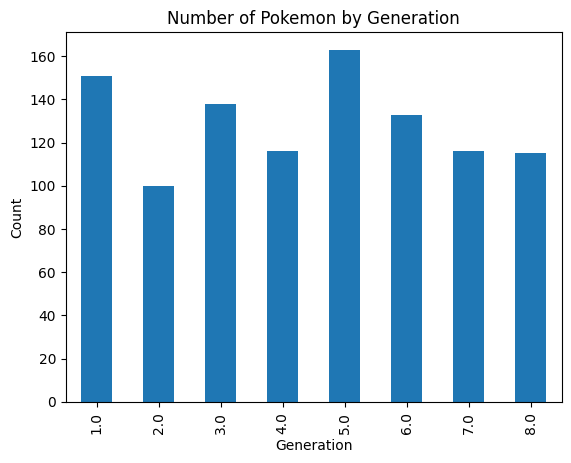

'Claro! Vou plotar um gráfico de colunas que mostra a quantidade total de pokemons por geração.'

In [29]:
pandas_ai.run(pokemons, prompt="Plote um gráfico de colunas totalizando pokemons por geração.")

Parece que funcionou bem!

## O que aprendemos até aqui

A biblioteca Pandas AI é uma biblioteca interessante, que nos permite "dialogar"com nossos DataFrames, mas infelizmente, parece estar bem afetado por alucinações, passando informações incorretas. 

Ela sofre de um problema de performance, por precisar processar o texto. Então, algo que em pandas leva um segundo ou menos, como podemos ver, pode levar até mais de 1 minuto usando PandasAI.

Ainda, podemos perceber que a biblioteca passa a responder em inglês quando a resposta está errada. 

## Vale a pena utilizar?

Se você quer fazer explorações simples dos dados, parece ser uma boa idéia utilizar o PandasAI, visto que é mais fácil perguntar em português ou inglês do que lembrar a sintaxe de todos os comandos Pandas que você teria que fazer para isso. No entanto, é preciso tomar muito cuidado com os resultados, que podem estar errados, mas são comunicados com convicção.

É, com certeza, mais uma ferramenta no seu cinto de utilidades de cientista de dados, e como toda ferramenta, devemos conhece-la bem antes de usar. Explore mais, entenda suas limitações e faça o melhor uso possivel!

Até mais!!!

Walter.